In [ ]:
!pip install wandb

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback

In [ ]:
wandb.init(project='cfar100')

In [ ]:


config=wandb.config
config.learning_rate=0.001



In [ ]:
dataset=tf.keras.datasets.cifar100
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

[19]


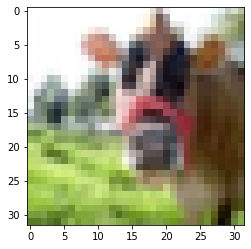

In [ ]:
plt.imshow(X_train[0])
print(Y_train[0])

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:

X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2]*X_train.shape[3])

In [ ]:
X_train.shape

(50000, 3072)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [ ]:
X_train,X_val,X_test = X_train / 255.0,X_val/255.0,X_test / 255.0

In [ ]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(100,activation='softmax')#output_layer

])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 8s 5ms/step - loss: 4.2713 - accuracy: 0.0459 - val_loss: 3.9902 - val_accuracy: 0.0853 - _timestamp: 1646729647.0000 - _runtime: 25.0000
Epoch 2/10
1250/1250 [==============================] - 6s 4ms/step - loss: 3.9233 - accuracy: 0.0926 - val_loss: 3.8225 - val_accuracy: 0.1152 - _timestamp: 1646729652.0000 - _runtime: 30.0000
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 3.7809 - accuracy: 0.1181 - val_loss: 3.7362 - val_accuracy: 0.1285 - _timestamp: 1646729657.0000 - _runtime: 35.0000
Epoch 4/10
1250/1250 [==============================] - 5s 4ms/step - loss: 3.6996 - accuracy: 0.1338 - val_loss: 3.7488 - val_accuracy: 0.1266 - _timestamp: 1646729662.0000 - _runtime: 40.0000
Epoch 5/10
1250/1250 [==============================] - 5s 4ms/step - loss: 3.6473 - accuracy: 0.1438 - val_loss: 3.6576 - val_accuracy: 0.1401 - _timestamp: 1646729668.0000 - _runtime: 46.0000
Epoch 6/10
1250/1250 [========

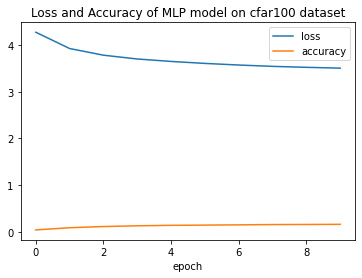

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model on cfar100 dataset')
plt.show()

In [ ]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 1)
(10000, 3072)


In [ ]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 3.6115 - accuracy: 0.1534


In [ ]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [ ]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [ ]:
model_deep=tf.keras.models.Sequential([
                                       layers.Conv2D(16,(3,3),activation='relu',input_shape=(32,32,3)),
                                       layers.Conv2D(16,(3,3),activation='relu'),
                                       layers.MaxPooling2D((2,2)),
                                       layers.Conv2D(32,(3,3),activation='relu'),
                                       layers.Conv2D(32,(3,3),activation='relu'),
                                       layers.MaxPooling2D((2,2)),
                                       layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Conv2D(64,(3,3),activation='relu'),
                                       layers.Flatten(),
                                       layers.Dense(64,activation='relu'),
                                       layers.Dense(100,activation='softmax')

])

In [ ]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                  

In [ ]:
model_deep.compile(tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:

output_deep=model_deep.fit(X_train_deep,Y_train_deep,validation_data=(X_val_deep,Y_val_deep),epochs=10,callbacks=[WandbCallback()])

Epoch 1/10
1250/1250 [==============================] - 20s 10ms/step - loss: 4.3413 - accuracy: 0.0288 - val_loss: 4.0517 - val_accuracy: 0.0555 - _timestamp: 1646729744.0000 - _runtime: 122.0000
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.9288 - accuracy: 0.0841 - val_loss: 3.7563 - val_accuracy: 0.1145 - _timestamp: 1646729755.0000 - _runtime: 133.0000
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.6633 - accuracy: 0.1346 - val_loss: 3.5150 - val_accuracy: 0.1564 - _timestamp: 1646729766.0000 - _runtime: 144.0000
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.4418 - accuracy: 0.1733 - val_loss: 3.4081 - val_accuracy: 0.1824 - _timestamp: 1646729776.0000 - _runtime: 154.0000
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 3.2891 - accuracy: 0.1995 - val_loss: 3.2553 - val_accuracy: 0.2112 - _timestamp: 1646729787.0000 - _runtime: 165.0000
Epoch 6/10
1250/125

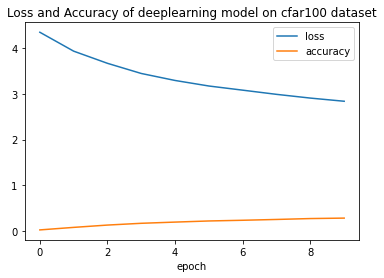

In [ ]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model on cfar100 dataset')
plt.show()

In [ ]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 2s 5ms/step - loss: 3.0286 - accuracy: 0.2612


[3.028580904006958, 0.2612000107765198]